In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join
from astropy.io.ascii import read
from fancy_plot import fancy_plot

In [91]:
#Read in csv fil
cep = read('full_2MASS_query-result.csv')
#Read in just spectroscopic sources for comparison
cep_spec = read('cep_ob3b_dis.csv')



In [92]:
#also find inconsistent distances
cep_spec['par_diff'] = np.abs(cep_spec['parallax']-1.221-0.029)
#cep_spec['par_diff_err'] = np.sqrt(0.024**2+cep_spec['parallax_error']**2)
#Use sigma from fit rather than error in mean if using Gaussian assumption
cep_spec['par_diff_err'] = np.sqrt(0.121**2+cep_spec['parallax_error']**2)
cep_spec['par_diff_sig'] = cep_spec['par_diff']/cep_spec['par_diff_err']


contamination_par, = np.where(cep_spec['par_diff_sig'] > 3.)
print(contamination_par.size)
cep_spec[contamination_par].pprint()


39
     source_id      original_ext_source_id ...    par_diff_sig   
------------------- ---------------------- ... ------------------
2207262205420693888       22523670+6230553 ...  3.638629039350672
2207262140997589760       22524793+6230571 ...  23.50578071828698
2207262072278113536       22525102+6230436 ... 23.575980023513253
2207279080343450752       22525120+6241051 ...  7.367731440819979
2207262892615548288       22531574+6234357 ...  4.244364715712512
2207276499071908224       22532966+6239056 ... 3.9132554411363007
2207263412309198720       22534497+6234024 ...  7.379484125152234
2207276881325611648       22540533+6240313 ... 3.8423582886665812
2207270971450638592       22542713+6240522 ... 5.2351177528288595
2207270765292218240       22542993+6240335 ...  3.619228135281522
                ...                    ... ...                ...
2207268665048936064       22560798+6241451 ...  6.153231076730823
2207267638556155904       22561022+6240021 ...  4.550457420849835
2207267

In [93]:
non_cluster_par = cep_spec[contamination_par]

In [94]:
non_cluster_par.rename_column('col1','2MASS')

In [95]:
halp = read('table1.txt')
xray = read('tablec3.txt')
print(halp.columns)
print(xray.columns)

<TableColumns names=('2MASS','YSO','Teff','SA','Lbol','HaEW','HaFlux','HaLum','HaFluxUnc','Av','GoodHa')>
<TableColumns names=('2MASS','Cnts','AttXflux','AttXfluxUnc','UnattXflux','UnattXfluxUnc','XSurfaceFlux','XSurfaceFluxUnc')>


In [96]:
test1 = join(non_cluster_par,halp,keys=['2MASS'])
allpar= join(test1,xray,keys=['2MASS'])
print(allpar.columns)

<TableColumns names=('source_id','original_ext_source_id','gaia_astrometric_params','tmass_oid','number_of_neighbours','number_of_mates','best_neighbour_multiplicity','2MASS','parallax','parallax_error','pmra','pmdec','pmra_error','pmdec_error','ra','dec','par_diff','par_diff_err','par_diff_sig','YSO','Teff','SA','Lbol','HaEW','HaFlux','HaLum','HaFluxUnc','Av','GoodHa','Cnts','AttXflux','AttXfluxUnc','UnattXflux','UnattXfluxUnc','XSurfaceFlux','XSurfaceFluxUnc')>


In [97]:
allpar['2MASS','Teff','YSO','GoodHa','HaEW','HaFlux','Cnts','XSurfaceFlux','parallax','parallax_error'].pprint(max_lines=-1,max_width=-1)

     2MASS       Teff YSO GoodHa  HaEW    HaFlux   Cnts XSurfaceFlux        parallax          parallax_error   
       --         K    --   --   0.1 nm  mW / m2    --    [mW/m2]                                              
---------------- ---- --- ------ ------ --------- ----- ------------ --------------------- --------------------
22523670+6230553 3630 III yes \\   -9.3  1.36e+06    23         6.65    0.0364132498674219   0.3108059021592862
22524793+6230571 6090 III yes \\    nan -8.70e+03    62         6.02     4.161206816063586 0.026419496193453657
22525102+6230436 3630 III yes \\   -3.4  3.70e+06   138         6.61      4.23355971912786  0.03706900694162573
22525120+6241051 3970  II yes \\   -8.5  1.45e+07 -9999         6.31   -0.5957774200926915  0.21936311803474765
22531574+6234357 3770  II yes \\   -9.8  7.06e+06    55         6.37   -0.6368030331701493   0.4277587691655675
22532966+6239056 3160  II yes \\  -41.5  7.89e+06 -9999         6.68      2.96479488416106  0.4211646496

In [98]:
full_gaias = read('full_2MASS_query_error_arenou_2018-result.csv')
full_gaias.pprint()
full_gaias.rename_column('col2mass','2MASS')
print(full_gaias.columns)


     source_id      original_ext_source_id ... visibility_periods_used
------------------- ---------------------- ... -----------------------
2207181631839430784       22501421+6225502 ...                      15
2207261277707746176       22524912+6229208 ...                      16
2207262823896034304       22530261+6233395 ...                      11
2207281034554977024       22532592+6245475 ...                      17
2207264507524227584       22534250+6236413 ...                       4
2207270692273403392       22542529+6239310 ...                      15
2207266191153157760       22553701+6237109 ...                      15
2207285436900413952       22554207+6251409 ...                      18
2207216717420956032       22570044+6234437 ...                      14
2207226986693365632       22571626+6229227 ...                       4
                ...                    ... ...                     ...
2207244063478352256       22573122+6241466 ...                      18
220729

In [99]:
allpar= join(allpar,full_gaias,keys=['2MASS'])

In [100]:
#U used in equation 1 in Arenou et al. (2018)
allpar['u'] = np.sqrt(allpar['astrometric_chi2_al']/(allpar['astrometric_n_good_obs_al']-5))

In [101]:
#Exponetial part of equation 1 in Arenou et al. (2018)
allpar['u_comp_exp'] = np.exp(-0.2*(allpar['phot_g_mean_mag']-19.5))

In [102]:
#set values less than 1 equal to 1
allpar['u_comp_exp'][allpar['u_comp_exp'] < 1.] = 1.

In [103]:
#Good measurements Arenou et al. (2015) Section 4.1
#https://www.aanda.org/articles/aa/full_html/2018/08/aa33234-18/aa33234-18.html#S11
#OR Lindegren et al. (2018) Section C.3
allpar['u_pass'] = allpar['u'] < 1.2*allpar['u_comp_exp']
allpar['c_pass'] = ((allpar['phot_bp_rp_excess_factor'] > 1.0+0.015*allpar['bp_rp']**2) &
                    (allpar['phot_bp_rp_excess_factor'] < 1.3+0.06*allpar['bp_rp']**2))
allpar['v_pass'] = allpar['visibility_periods_used'] > 8

In [104]:
#print table of bad distances
allpar['2MASS','Teff','YSO','GoodHa','HaEW','HaFlux','Cnts','XSurfaceFlux','u_pass','c_pass','v_pass'].pprint(max_lines=-1,max_width=-1)

     2MASS       Teff YSO GoodHa  HaEW    HaFlux   Cnts XSurfaceFlux u_pass c_pass v_pass
       --         K    --   --   0.1 nm  mW / m2    --    [mW/m2]                        
---------------- ---- --- ------ ------ --------- ----- ------------ ------ ------ ------
22523670+6230553 3630 III yes \\   -9.3  1.36e+06    23         6.65  False  False   True
22524793+6230571 6090 III yes \\    nan -8.70e+03    62         6.02   True   True   True
22525102+6230436 3630 III yes \\   -3.4  3.70e+06   138         6.61   True   True   True
22525120+6241051 3970  II yes \\   -8.5  1.45e+07 -9999         6.31  False  False   True
22531574+6234357 3770  II yes \\   -9.8  7.06e+06    55         6.37  False   True   True
22532966+6239056 3160  II yes \\  -41.5  7.89e+06 -9999         6.68  False  False   True
22534497+6234024 6100 III yes \\    0.6 -2.32e+06    70         6.43   True   True   True
22540533+6240313 3770  II yes \\  -10.7  7.71e+06    51         6.49  False   True   True
22542713+6

In [105]:
#Print table of bad distance that could affect our results
poss_ha = ( allpar['HaEW'].data.data.astype('float') < 0.)
poss_xr = (allpar['Cnts'].data.data.astype('float') > 0)
poss_ga = (allpar['u_pass'] & allpar['c_pass'] & allpar['v_pass'])

poss_ct = (((poss_ha) | (poss_xr)) & (poss_ga))
badpar = allpar[poss_ct]
badpar['2MASS','Teff','YSO','GoodHa','HaEW','HaFlux','Cnts','u_pass','c_pass','v_pass','parallax_1','parallax_error_1'].pprint(max_lines=-1,max_width=-1)


     2MASS       Teff YSO GoodHa  HaEW    HaFlux   Cnts u_pass c_pass v_pass       parallax_1        parallax_error_1  
       --         K    --   --   0.1 nm  mW / m2    --                                                                 
---------------- ---- --- ------ ------ --------- ----- ------ ------ ------ --------------------- --------------------
22524793+6230571 6090 III yes \\    nan -8.70e+03    62   True   True   True     4.161206816063586 0.026419496193453657
22525102+6230436 3630 III yes \\   -3.4  3.70e+06   138   True   True   True      4.23355971912786  0.03706900694162573
22534497+6234024 6100 III yes \\    0.6 -2.32e+06    70   True   True   True   0.27858084767069424 0.051841236945398585
22550031+6246239 9520  II yes \\  -25.7  1.41e+08 -9999   True   True   True -0.002942251066024911   0.0883815769586812
22552142+6240075 3160 III  no \\  -10.5  1.91e+06    18   True   True   True    0.4769580929806339  0.22155922355815194
22552914+6235214 6140 III yes \\    2.6 

/home/jakub/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [106]:
#Expected stars beyond 3 sigma from the mean from a Gaussian distribution compared to measured
print('Gaussian Expected',len(allpar)*0.003)
print('Actual Measured ',len(badpar))

Gaussian Expected 0.123
Actual Measured  7


In [107]:
#Plot bad guys on HR diagram
names = ['SEP','log10_isochrone_age_yr','initial_mass','star_mass',
         'log_Teff','log_g','log_L','[Fe/H]_init','[Fe/H]','Bessell_U',
         'Bessell_B','Bessell_V','Bessell_R','Bessell_I','2MASS_J','2MASS_H',
         '2MASS_Ks','Kepler_Kp','Kepler_D51','Hipparcos_Hp','Tycho_B','Tycho_V',
         'Gaia_G_DR2Rev','Gaia_BP_DR2Rev','Gaia_RP_DR2Rev','TESS','phase']


tracks = read('MIST_v1.2_vvcrit0.4_UBVRIplus/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd',names=names)

In [108]:
years = np.unique(tracks['log10_isochrone_age_yr'])
mass  = np.unique(tracks['initial_mass'])


In [109]:
#distance modulus m-M = 5log(d/10)
badpar['mu'] = 5.*np.log10(1.e3/badpar['parallax_1']/10)
badpar['mu_unc'] = -5*badpar['parallax_error_1']/(np.log(10)*badpar['parallax_1'])
badpar['MG_gaia'] = badpar['phot_g_mean_mag']-badpar['mu']
#Jordi et al 2008
#Table 8
#For Aλ=550= 1 AG/AV 0.9500 -0.1569 0.0210 -0.0010 0.01
#For Aλ=550= 3 AG/AV 0.8929 -0.1378 0.0186 -0.0008 0.01
#For Aλ=550= 5 AG/AV 0.8426 -0.1187 0.0157 -0.0007 0.01
badpar['MG_gaia'] -= badpar['Av']*0.9

/home/jakub/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


/home/jakub/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


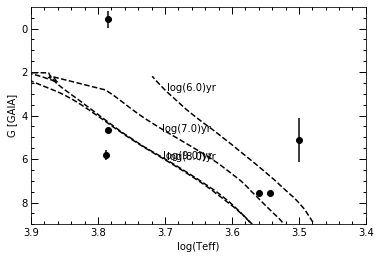

In [123]:

fig, ax = plt.subplots()
#log years
use_year = [np.log10(1E6),np.log10(2E6),np.log10(5e6),
            np.log10(1e7),np.log10(2E7),np.log10(5e7),
            np.log10(1e8),np.log10(5e8),np.log10(1e9)]
for i in use_year:
    this_age, = np.where((tracks['log10_isochrone_age_yr'] == i) & (tracks['Gaia_G_DR2Rev'] > 2))
    if this_age.size == 0: continue
    ax.plot(tracks['log_Teff'][this_age],tracks['Gaia_G_DR2Rev'][this_age],color='black',linestyle='--')
    dum = np.abs(tracks['log_Teff'][this_age]-3.7)
    close37, = np.where(dum == dum.min())
    ax.text(3.7+np.random.uniform(-0.005,0.005),tracks['Gaia_G_DR2Rev'][this_age][close37],'log({0:2.1f})yr'.format(i))

ax.errorbar(np.log10(badpar['Teff']),badpar['MG_gaia'],color='black',yerr=badpar['mu_unc'],fmt='o')
ax.set_xlabel('log(Teff)')
ax.set_ylabel('G [GAIA]')
ax.set_xlim([3.9,3.4])
ax.set_ylim([9,-1])
fancy_plot(ax)
fig.savefig('hr_diagram_gaia.png',bbox_pad=.1,bbox_inches='tight')

plt.show()

In [111]:
from scipy.special import erf

In [112]:
#add new GAIA uncertainty paramers
cep_spec.rename_column('col1','2MASS')
cep_spec= join(cep_spec,full_gaias,keys=['2MASS'])



In [113]:
cep_spec = join(cep_spec,halp,keys=['2MASS'])
cep_spec= join(cep_spec,xray,keys=['2MASS'])

In [114]:
#Stars used in our analysis
poss_ha = ( cep_spec['HaEW'].data.data.astype('float') < 0.)
poss_xr = (cep_spec['Cnts'].data.data.astype('float') > 0)

#U used in equation 1 in Arenou et al. (2018)
cep_spec['u'] = np.sqrt(cep_spec['astrometric_chi2_al']/(cep_spec['astrometric_n_good_obs_al']-5))

#Exponetial part of equation 1 in Arenou et al. (2018)
cep_spec['u_comp_exp'] = np.exp(-0.2*(cep_spec['phot_g_mean_mag']-19.5))

#set values less than 1 equal to 1
cep_spec['u_comp_exp'][cep_spec['u_comp_exp'] < 1.] = 1.

#Good measurements Arenou et al. (2015) Section 4.1
#https://www.aanda.org/articles/aa/full_html/2018/08/aa33234-18/aa33234-18.html#S11
#OR Lindegren et al. (2018) Section C.3
cep_spec['u_pass'] = cep_spec['u'] < 1.2*cep_spec['u_comp_exp']
cep_spec['c_pass'] = ((cep_spec['phot_bp_rp_excess_factor'] > 1.0+0.015*cep_spec['bp_rp']**2) &
                    (cep_spec['phot_bp_rp_excess_factor'] < 1.3+0.06*cep_spec['bp_rp']**2))
cep_spec['v_pass'] = cep_spec['visibility_periods_used'] > 8

poss_spec = (cep_spec['u_pass'] & cep_spec['c_pass'] & cep_spec['v_pass'] & (poss_ha  | poss_xr))


cep_spec = cep_spec[poss_spec]

/home/jakub/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


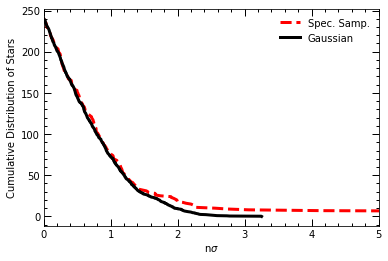

In [122]:
#Compare difference in "good" sigma to normal distribution
#

fig, ax = plt.subplots()
ax.plot(np.sort(cep_spec['par_diff_sig']),cep_spec['par_diff_sig'].size-
        np.arange(cep_spec['par_diff_sig'].size),linewidth=3,color='red',linestyle='--',label='Spec. Samp.') 

samps= 1000
xs = np.random.normal(size=samps)
ys = np.linspace(cep_spec['par_diff_sig'].size,0,samps)

ax.plot(np.sort(np.abs(xs)),ys,color='black',linewidth=3,label='Gaussian')

ax.set_xlabel('n$\sigma$')
ax.set_ylabel('Cumulative Distribution of Stars')
ax.set_xlim([0.,5.])
ax.legend(loc='upper right',frameon=False)
fancy_plot(ax)
fig.savefig('cumla_dis_gaia.png',bbox_pad=.1,bbox_inches='tight')
plt.show()